<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/Big-Data/Assignment-2/C1%EC%84%B1%EB%AF%BC%EC%A7%80_%EC%A2%85%ED%95%A9%EC%8B%A4%EC%8A%B5-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [183]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# from scipy.stats import skew, kurtosis


import graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import graphviz

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
df_raw = pd.read_csv('/content/mydrive/MyDrive/SCALE불량.csv', encoding = 'euc-kr')

print(df_raw.shape)
df_raw.head()

(720, 21)


,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2021-08-01:08:00:01,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2021-08-01:08:07:11,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2021-08-01:08:14:21,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2021-08-01:08:21:31,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2021-08-01:08:28:41,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조


In [5]:
df_raw.drop(['PLATE_NO', 'ROLLING_DATE'], axis = 1, inplace = True)

후판번호와 열연작업시각은 분석대상에서 제외한다.

In [6]:
df_raw['FUR_NO_ROW'] = df_raw['FUR_NO_ROW'].astype('object')

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              720 non-null    object 
 1   SPEC               720 non-null    object 
 2   STEEL_KIND         720 non-null    object 
 3   PT_THICK           720 non-null    float64
 4   PT_WIDTH           720 non-null    int64  
 5   PT_LENGTH          720 non-null    int64  
 6   PT_WEIGHT          720 non-null    int64  
 7   FUR_NO             720 non-null    object 
 8   FUR_NO_ROW         720 non-null    object 
 9   FUR_HZ_TEMP        720 non-null    int64  
 10  FUR_HZ_TIME        720 non-null    int64  
 11  FUR_SZ_TEMP        720 non-null    int64  
 12  FUR_SZ_TIME        720 non-null    int64  
 13  FUR_TIME           720 non-null    int64  
 14  FUR_EXTEMP         720 non-null    int64  
 15  ROLLING_TEMP_T5    720 non-null    int64  
 16  HSB                720 non

7개의 범주형 변수와 12개의 연속형 변수로 구성되어 있다.

### **데이터 전처리 및 EDA**

**연속형 변수와 범주형 변수 나누기**

In [10]:
# 연속형 변수와 범주형 변수 나누기

df_raw_num = df_raw[['PT_THICK', 'PT_WIDTH', 'PT_LENGTH', 'PT_WEIGHT',
                    'FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME',
                    'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5', 'ROLLING_DESCALING']]

df_raw_cat = df_raw[['STEEL_KIND', 'FUR_NO', 'FUR_NO_ROW', 'HSB', 'WORK_GR']]

In [11]:
df_raw_y = df_raw['SCALE']

#### **결측치 확인하기**

In [12]:
df_raw.isnull().sum()

SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THICK             0
PT_WIDTH             0
PT_LENGTH            0
PT_WEIGHT            0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

결측치는 없는 것으로 파악된다.

#### **이상치 처리하기**

In [13]:
# 각 변수의 이상치가 가지는 인덱스값 반환


def outlier_idx_detection(data) :

    outlier_indices = []
    for col in data.columns :
        q1, q3 = np.percentile(data[col], [25, 75])
        IQR = q3 - q1
        lower = q1 - 1.5 * IQR
        upper = q3 + 1.5 * IQR

        outlier_idx = data[(data[col] < lower) | (data[col] > upper)].index
        outlier_indices.append(list(outlier_idx))

    outlier_index = []
    for lst in outlier_indices :
        for i in range(len(lst)) :
            outlier_index.append(lst[i])

    return list(set(outlier_index))

In [14]:
outliers = outlier_idx_detection(df_raw_num)

print(len(outliers))
outliers

111


[512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 521,
 524,
 525,
 526,
 527,
 528,
 532,
 533,
 534,
 536,
 537,
 538,
 543,
 544,
 545,
 546,
 547,
 548,
 549,
 550,
 551,
 552,
 553,
 554,
 555,
 556,
 557,
 558,
 559,
 560,
 561,
 562,
 563,
 564,
 565,
 566,
 567,
 568,
 569,
 570,
 572,
 573,
 574,
 575,
 576,
 85,
 86,
 87,
 88,
 89,
 106,
 640,
 641,
 157,
 184,
 185,
 41,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 351,
 354,
 355,
 357,
 437,
 438,
 442,
 443,
 444,
 447,
 448,
 449,
 450,
 452,
 454,
 456,
 460,
 461,
 463,
 469,
 473,
 475,
 481,
 489,
 492,
 493,
 494,
 495,
 496,
 500,
 501,
 505,
 506,
 507,
 508,
 509,
 510,
 511]

In [15]:
df_raw.drop(outliers, axis = 0, inplace = True)
df_raw_y.drop(outliers, axis = 0, inplace = True)

In [16]:
print(df_raw.shape)
df_raw.head()

(609, 19)


,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1열,1144,116,1133,59,282,1125,934,적용,8,2조
1,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2열,1144,122,1135,53,283,1120,937,적용,8,2조
2,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1열,1129,116,1121,55,282,1106,889,적용,8,3조
3,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2열,1152,125,1127,68,316,1113,885,적용,8,3조
4,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1열,1140,134,1128,48,314,1118,873,적용,8,1조


In [17]:
print(df_raw_y.shape)
df_raw_y.head()

(609,)


0    양품
1    양품
2    양품
3    양품
4    양품
Name: SCALE, dtype: object

#### **연속형 변수의 분포 확인하기**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48520 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_te

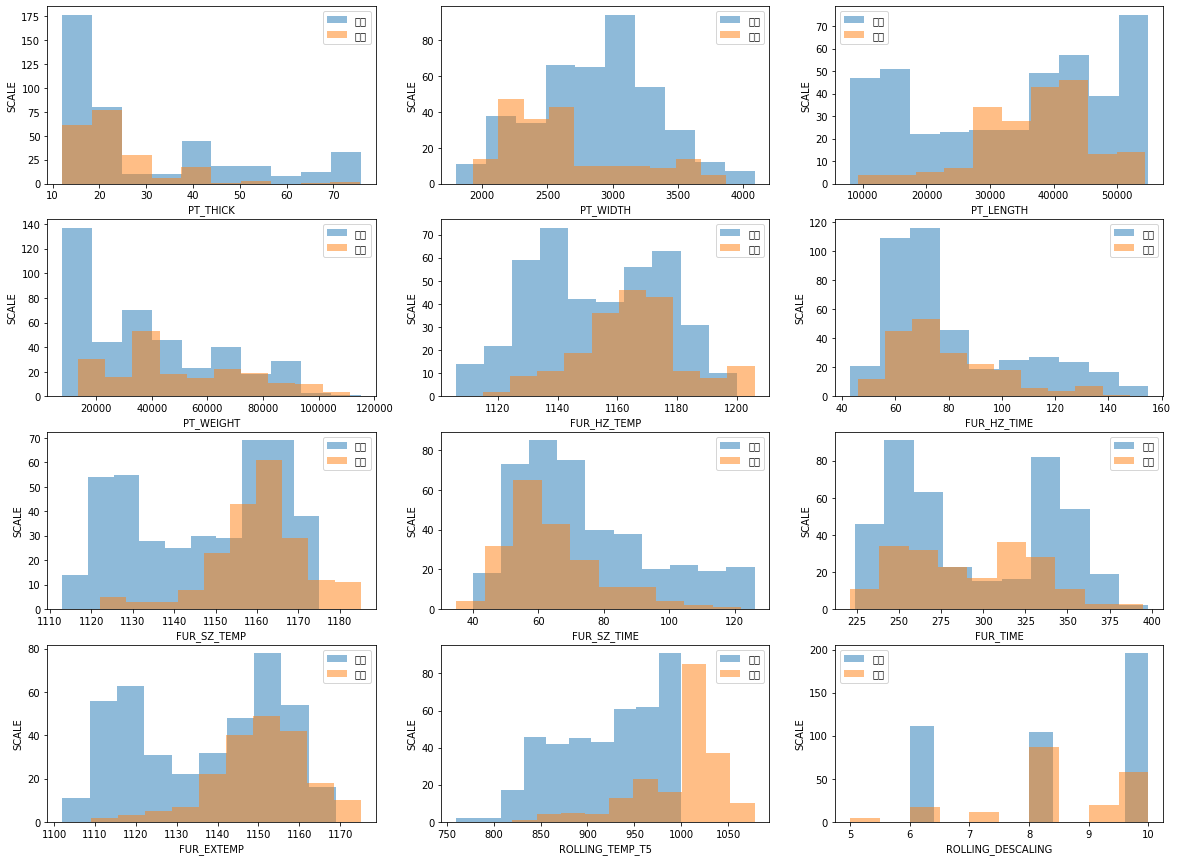

In [18]:
num = 0
fig = plt.figure(figsize = (20, 15))


for col in df_raw_num.columns:
    plt.subplot(4, 3, num+1)
    num += 1
    plt.hist(df_raw[df_raw["SCALE"] == '양품'][col], label = "양품", alpha = 0.5)
    plt.hist(df_raw[df_raw["SCALE"] == '불량'][col], label = "불량", alpha = 0.5)
    plt.xlabel(col)
    plt.ylabel("SCALE")
    plt.legend()
plt.show()

- PT_THK, PT_WDTH, PT_LTH, FUR_HZ_TEMP, FUR_HZ_TIME, FUR_SZ_TEMP, FUR_SZ_TIME, FUR_EXTEMP에 따라 scale의 불량 여부가 영향을 받는다.
- 후판 지시두께가 두꺼울수록, 후판 지시폭이 넓을수록, 후판 지시길이가 길수록, 가열로 가열대 소재온도가 높을수록, 가열로 가열대 재로시간이 짧을수록, 가열로 균열대 소재온도가 높을수록, 가열로 균열대 재로시간이 짧을수록, 가열로 추출온도가 높을수록 불량률이 커진다.

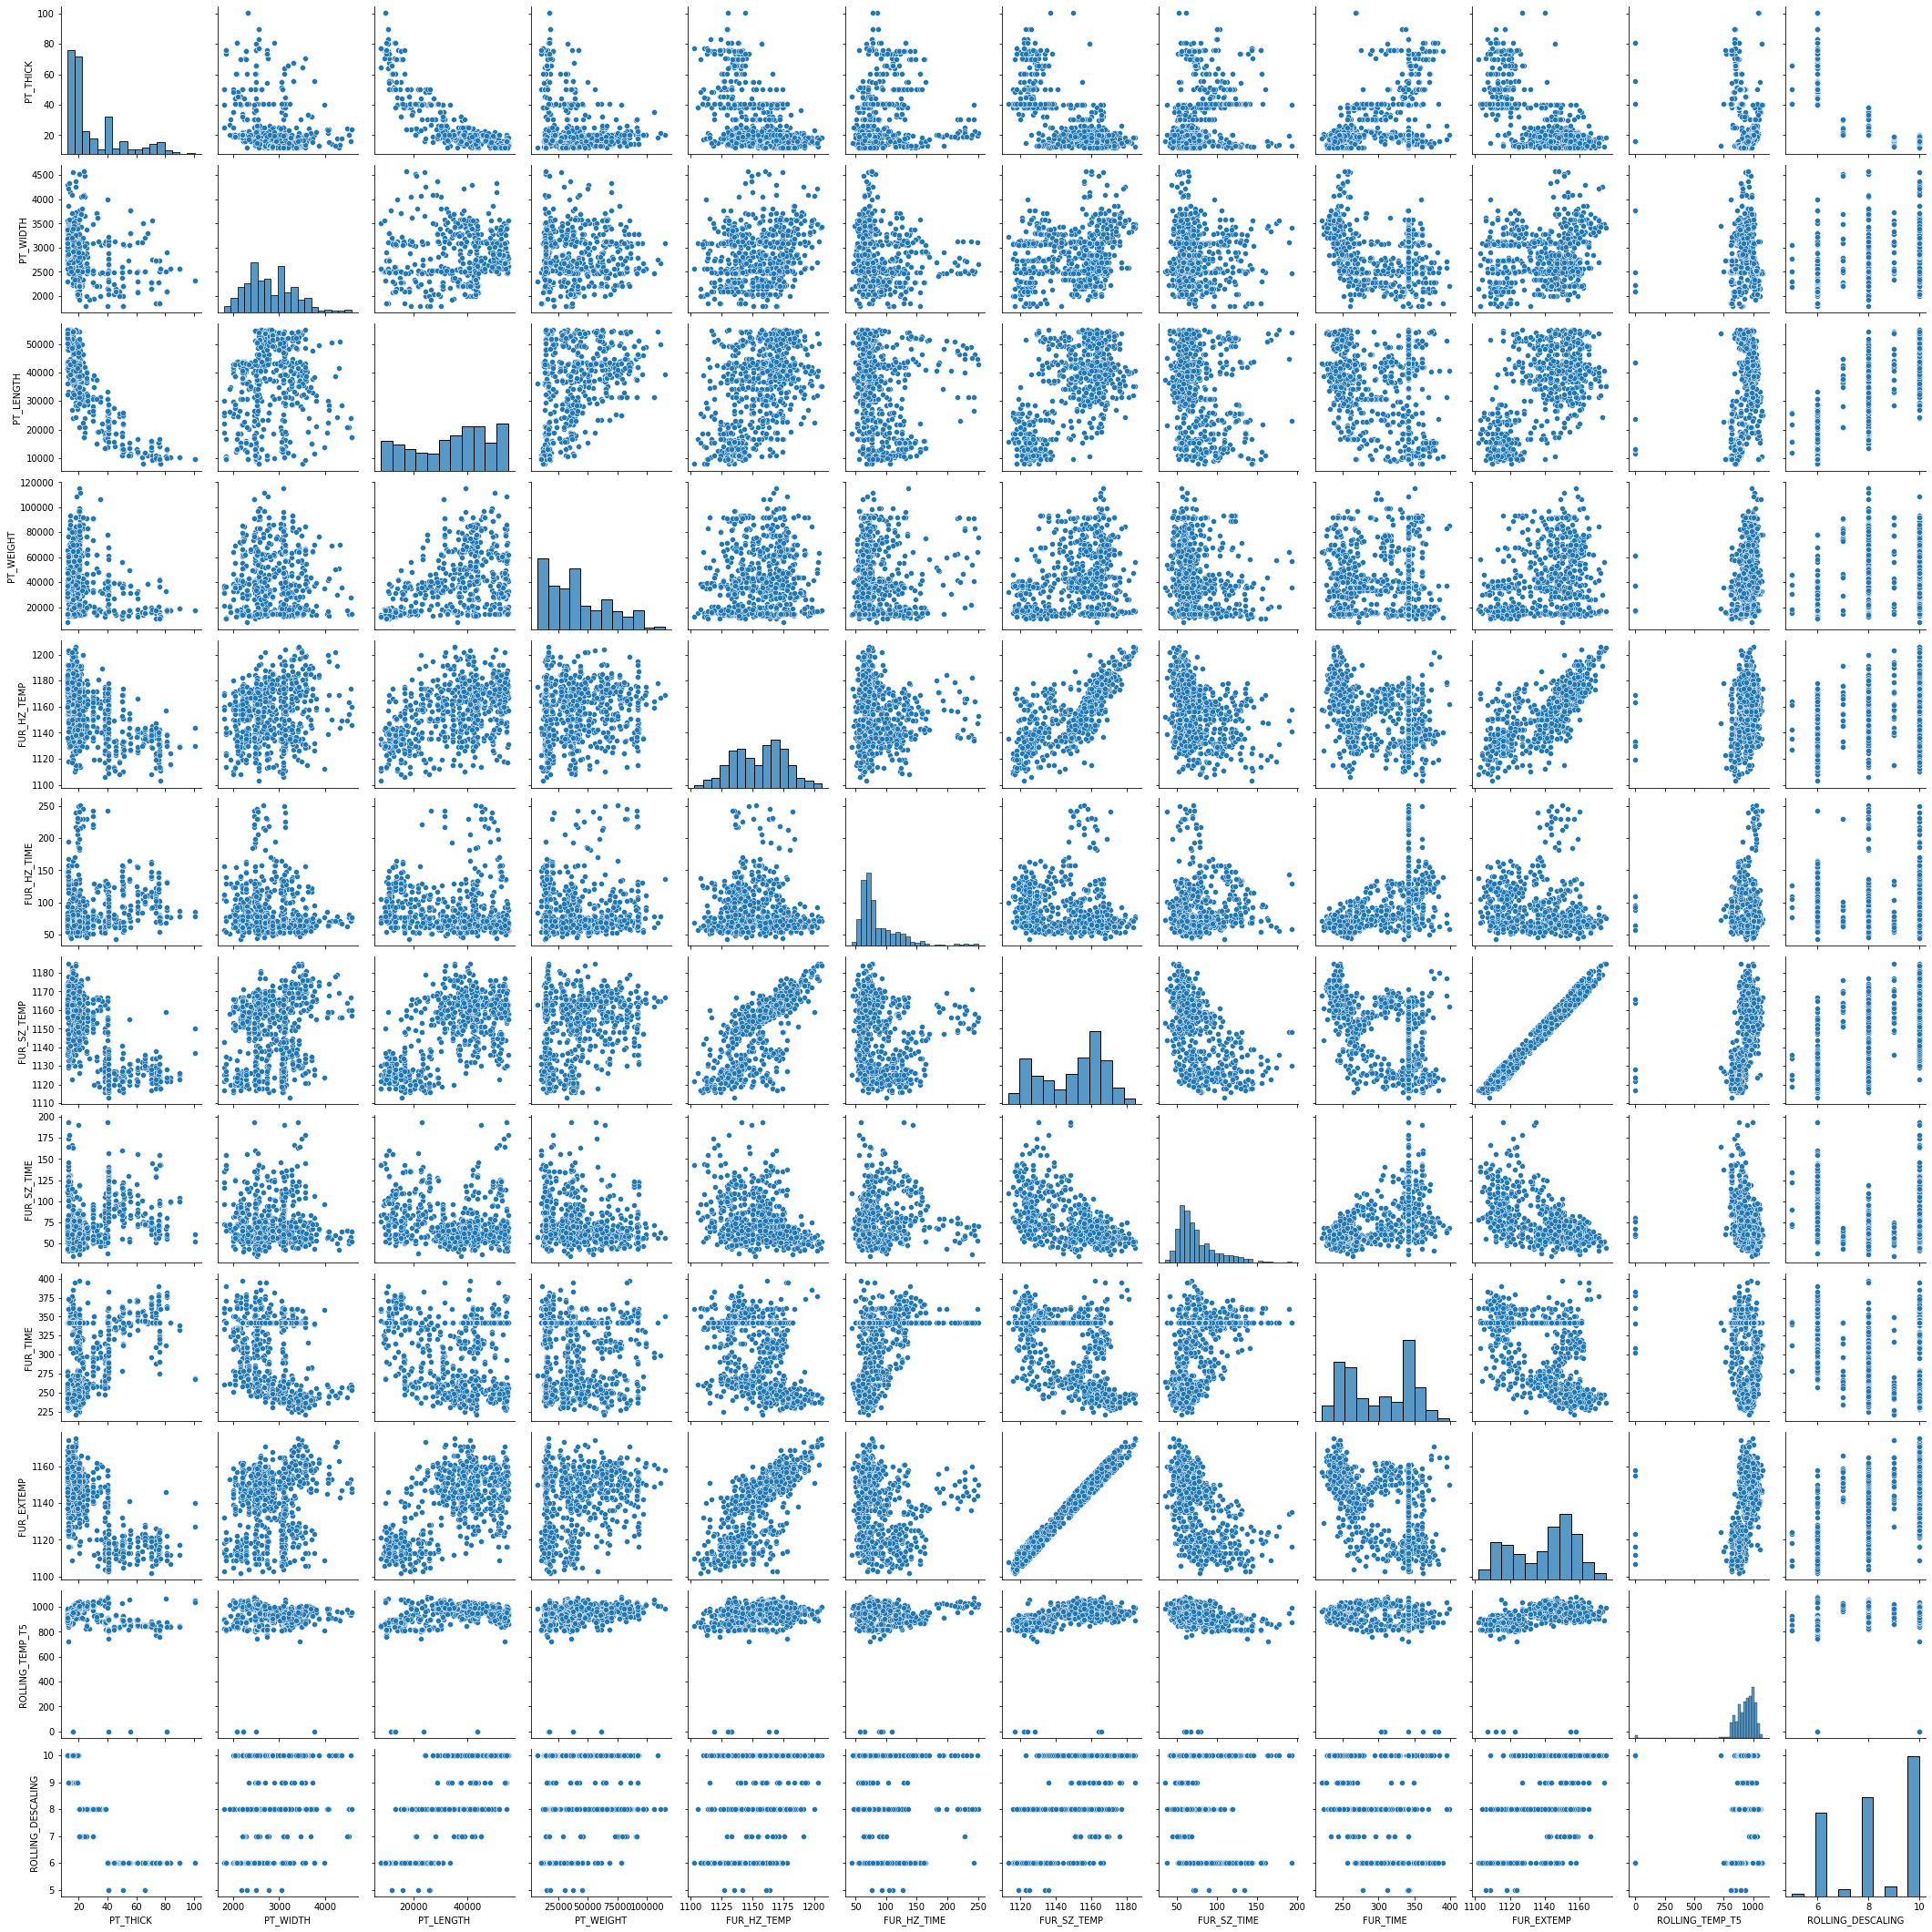

In [19]:
sns.pairplot(df_raw_num)

- FUR_EXTEMP와 FUR_SZ_TEMP는 매우 높은 상관관계를 가지고 있는 것으로 보인다.
- FUR_HZ_TEMP와 FUR_SZ_TEMP 사이에도 어느 정도의 연관성이 존재하는 것으로 파안된다.

#### **범주형 변수의 분포 확인하기**

In [20]:
print(df_raw_cat.shape)
df_raw_cat.head()

(720, 5)


,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,WORK_GR
0,T1,1호기,1열,적용,2조
1,T1,1호기,2열,적용,2조
2,T8,2호기,1열,적용,3조
3,T8,2호기,2열,적용,3조
4,T8,3호기,1열,적용,1조


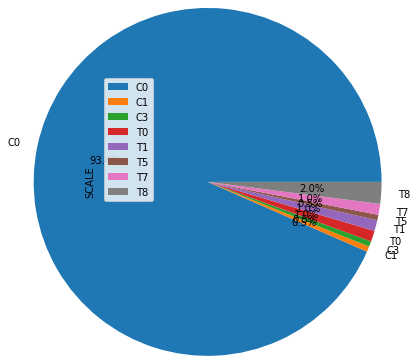

In [22]:
pieplt = df_raw[df_raw["SCALE"] == '불량']
pieplt_count = pieplt.groupby("STEEL_KIND", as_index = False).agg("count")
pieplt_count.plot.pie(y = "SCALE", labels = pieplt_count["STEEL_KIND"], autopct= "%.1f%%", radius = 2)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)


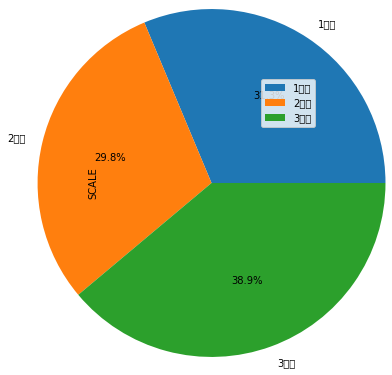

In [23]:
pieplt = df_raw[df_raw["SCALE"] == '불량']
pieplt_count = pieplt.groupby("FUR_NO", as_index = False).agg("count")
pieplt_count.plot.pie(y = "SCALE", labels = pieplt_count["FUR_NO"], autopct= "%.1f%%", radius = 2)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50676 missing from current font.
  font.set_text(s, 0, flags=flags)


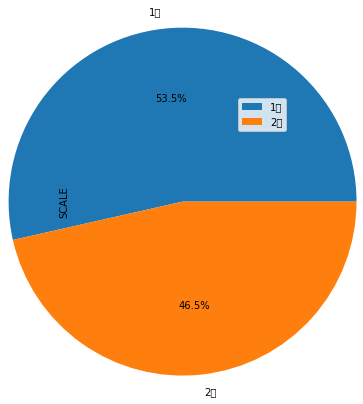

In [24]:
pieplt = df_raw[df_raw["SCALE"] == '불량']
pieplt_count = pieplt.groupby("FUR_NO_ROW", as_index = False).agg("count")
pieplt_count.plot.pie(y = "SCALE", labels = pieplt_count["FUR_NO_ROW"], autopct= "%.1f%%", radius = 2)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text

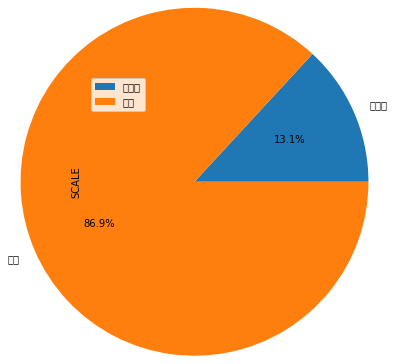

In [25]:
pieplt = df_raw[df_raw["SCALE"] == '불량']
pieplt_count = pieplt.groupby("HSB", as_index = False).agg("count")
pieplt_count.plot.pie(y = "SCALE", labels = pieplt_count["HSB"], autopct= "%.1f%%", radius = 2)

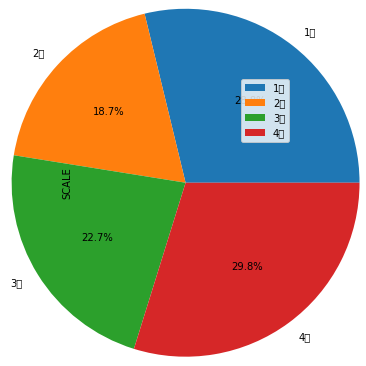

In [27]:
pieplt = df_raw[df_raw["SCALE"] == '불량']
pieplt_count = pieplt.groupby("WORK_GR", as_index = False).agg("count")
pieplt_count.plot.pie(y = "SCALE", labels = pieplt_count["WORK_GR"], autopct= "%.1f%%", radius = 2)

범주형 변수의 파이 차트를 해석한 결과는 다음과 같다 :

- 후판강종이 C0일 때 불량률이 크다.
- 가열로 호기에 따른 불량여부의 차이는 없다.
- 가열로 장입열 구분에 따른 불량여부의 차이는 없다.
- HSB를 적용하지 않은 경우 불량률이 크다.
- 작업조에 따른 불량여부의 차이는 없다.

**<결론>**

EDA를 통해 확인한 결과는 다음과 같다.

| 연속형 변수  | 범주형 변수 |
|:-----------:|:-----------:|
|PT_THICK | STEEL_KIND = 'C0' |
|PT_WIDTH | HSB = '미적용' |
|PT_LENGTH | |
|FUR_HZ_TEMP | |
|FUR_HZ_TIME | |
|FUR_SZ_TEMP | |
|FUR_SZ_TIME | |
|FUR_EXTEMP | |

- 연속형 변수
    - PT_THICK, PT_WIDTH, PT_LENGTH, FUR_HZ_TEMP, FUR_SZ_TEMP, 그리고 FUR_EXTEMP가 클수록 불량률 또한 커진다.
    - FUR_HZ_TIME과 FUR_SZ_TIME이 작을수록 불량률이 커진다.

- 범주형 변수
    - STEEL_KIND = 'C', HSB = '미적용'일 때 불량률이 크다.

### **VITAL_FEW 확정하기**

In [44]:
df_raw_vital = df_raw[['PT_THICK', 'PT_WIDTH', 'PT_LENGTH',
                       'FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_EXTEMP',
                       'STEEL_KIND', 'HSB']]

df_raw_y = df_raw['SCALE']

In [45]:
print(df_raw_vital.shape)
df_raw_vital.head()

(609, 10)


,PT_THICK,PT_WIDTH,PT_LENGTH,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_EXTEMP,STEEL_KIND,HSB
0,32.25,3707,15109,1144,116,1133,59,1125,T1,적용
1,32.25,3707,15109,1144,122,1135,53,1120,T1,적용
2,33.27,3619,19181,1129,116,1121,55,1106,T8,적용
3,33.27,3619,19181,1152,125,1127,68,1113,T8,적용
4,38.33,3098,13334,1140,134,1128,48,1118,T8,적용


그래프를 통한 EDA를 바탕으로 총 10개의 vital few 변수를 설정하였다.

In [46]:
print(df_raw_y.shape)
df_raw_y.head()

(609,)


0    0
1    0
2    0
3    0
4    0
Name: SCALE, dtype: object

In [47]:
df_raw_vital['STEEL_KIND'].value_counts()

C0    436
T8     84
T5     27
T7     20
T1     18
T0     14
C3      7
T3      2
C1      1
Name: STEEL_KIND, dtype: int64

In [48]:
df_raw_vital.loc[df_raw_vital['STEEL_KIND'] == 'C0', 'STEEL_KIND'] = 1
df_raw_vital.loc[df_raw_vital['STEEL_KIND'] == 'C1', 'STEEL_KIND'] = 1
df_raw_vital.loc[df_raw_vital['STEEL_KIND'] == 'C3', 'STEEL_KIND'] = 1

df_raw_vital.loc[df_raw_vital['STEEL_KIND'] == 'T0', 'STEEL_KIND'] = 0
df_raw_vital.loc[df_raw_vital['STEEL_KIND'] == 'T1', 'STEEL_KIND'] = 0
df_raw_vital.loc[df_raw_vital['STEEL_KIND'] == 'T3', 'STEEL_KIND'] = 0
df_raw_vital.loc[df_raw_vital['STEEL_KIND'] == 'T5', 'STEEL_KIND'] = 0
df_raw_vital.loc[df_raw_vital['STEEL_KIND'] == 'T7', 'STEEL_KIND'] = 0
df_raw_vital.loc[df_raw_vital['STEEL_KIND'] == 'T8', 'STEEL_KIND'] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [49]:
df_raw_vital.loc[df_raw_vital['HSB'] == '적용', 'HSB'] = 1
df_raw_vital.loc[df_raw_vital['HSB'] == '미적용', 'HSB'] = 0

In [50]:
print(df_raw_vital.shape)
df_raw_vital.head()

(609, 10)


,PT_THICK,PT_WIDTH,PT_LENGTH,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_EXTEMP,STEEL_KIND,HSB
0,32.25,3707,15109,1144,116,1133,59,1125,0,1
1,32.25,3707,15109,1144,122,1135,53,1120,0,1
2,33.27,3619,19181,1129,116,1121,55,1106,0,1
3,33.27,3619,19181,1152,125,1127,68,1113,0,1
4,38.33,3098,13334,1140,134,1128,48,1118,0,1


In [51]:
df_raw_y[df_raw_y == '불량'] = 1
df_raw_y[df_raw_y == '양품'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
df_raw_vital.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 0 to 719
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PT_THICK     609 non-null    float64
 1   PT_WIDTH     609 non-null    int64  
 2   PT_LENGTH    609 non-null    int64  
 3   FUR_HZ_TEMP  609 non-null    int64  
 4   FUR_HZ_TIME  609 non-null    int64  
 5   FUR_SZ_TEMP  609 non-null    int64  
 6   FUR_SZ_TIME  609 non-null    int64  
 7   FUR_EXTEMP   609 non-null    int64  
 8   STEEL_KIND   609 non-null    object 
 9   HSB          609 non-null    object 
dtypes: float64(1), int64(7), object(2)
memory usage: 52.3+ KB


In [53]:
df_raw_vital['STEEL_KIND'] = df_raw_vital['STEEL_KIND'].astype(int)
df_raw_vital['HSB'] = df_raw_vital['HSB'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
df_raw_y = df_raw_y.astype(int)

In [55]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_vital,
                                                                df_raw_y,
                                                                test_size = 0.3)

print(df_train_x.shape)
print(df_test_x.shape)
print(df_train_y.shape)
print(df_test_y.shape)

(426, 10)
(183, 10)
(426,)
(183,)


계속해서 진행할 모델링을 위해 train set과 test set을 분리해주었다.

### **의사결정나무 (Decision Tree)**

#### **모델 생성하기**

In [56]:
tree_uncustomized = DecisionTreeClassifier()
tree_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set : {}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on training set : {}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.0
Accuracy on training set : 0.8142076502732241


- 기본 의사결정나무 분류 모델은 Train set과 test set에 대해 각각 100%, 81.4%의 정확도를 갖는다.
- Train set에 대해 모델이 과대적합 되어 있는 것으로 보인다.

#### **모델 파라미터 설정하기 : max_depth**

In [57]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth :
    tree = DecisionTreeClassifier(max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainScore'] = train_accuracy
df_accuracy_depth['TestScore'] = test_accuracy

In [58]:
df_accuracy_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.681,0.661
1,2,0.815,0.765
2,3,0.880,0.803
3,4,0.904,0.836
4,5,0.920,0.852
5,6,0.939,0.825
6,7,0.962,0.825
7,8,0.974,0.836
8,9,0.986,0.842
9,10,0.993,0.847


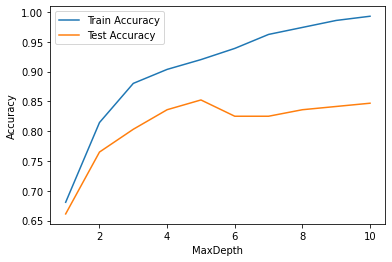

In [59]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('MaxDepth')
plt.legend()

- 나무의 최대 깊이가 커질수록 train set에 대한 모델의 성능이 좋아지는 반면에, test set에 대한 성능은 장기적인 관점에서 떨어진다.
- Train Accuracy와 test accuracy를 모두 챙길 수 있는 **max_depth = 5**를 선택한다.

#### **모델 파라미터 설정하기 : min_samples_split**

In [63]:
train_accuracy = []; test_accuracy = []
para_split = [n_split * 5 for n_split in range(1,21)]

for v_min_samples_split in para_split :
    tree = DecisionTreeClassifier(max_depth = 4,
                                  min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSampleSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

In [64]:
df_accuracy_split.round(3)

,MinSampleSplit,TrainAccuracy,TestAccuracy
0,5,0.904,0.836
1,10,0.904,0.836
2,15,0.904,0.836
3,20,0.904,0.836
4,25,0.899,0.847
5,30,0.899,0.847
6,35,0.899,0.847
7,40,0.899,0.847
8,45,0.899,0.847
9,50,0.899,0.847


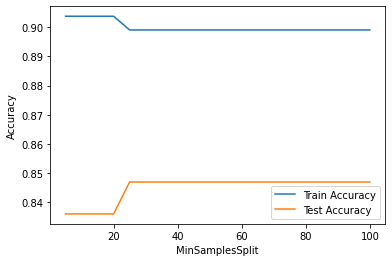

In [65]:
plt.plot(para_split, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('MinSamplesSplit')
plt.legend()

- 분리 노드의 최소 샘플 수가 계속해서 증가할 경우 모델의 성능에 변화가 생기지 않는다.
- 모델의 과대적합을 방지하기 위해 분리 노드의 최소 샘플 수를 최대한 크게 잡아야 하므로 **min_samples_split = 25**를 선택한다.

#### **모델 파라미터 설정하기 : min_samples_leaf**

In [69]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf :
    tree = DecisionTreeClassifier(max_depth = 4,
                                  min_samples_split = 25,
                                  min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSampleLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

In [70]:
df_accuracy_leaf.round(3)

,MinSampleLeaf,TrainAccuracy,TestAccuracy
0,1,0.899,0.847
1,2,0.897,0.852
2,3,0.897,0.842
3,4,0.897,0.842
4,5,0.897,0.842
5,6,0.897,0.842
6,7,0.892,0.842
7,8,0.892,0.842
8,9,0.873,0.798
9,10,0.873,0.798


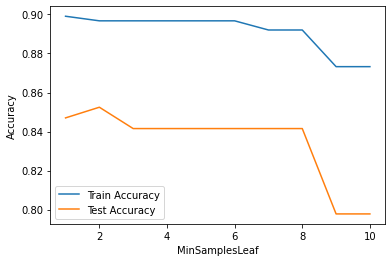

In [71]:
plt.plot(para_leaf, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('MinSamplesLeaf')
plt.legend()

- 리프 노드의 최소 샘플 수가 증가할수록 모델의 성능에 변화가 없다가 8을 지나면서 모델의 성능이 감소한다.

- Testscore가 0.852로 높게 나타나는 **min_samples_leaf = 2**를 파라미터로 설정한다. 

#### **최종 모델 선정 및 모델 평가**

In [72]:
tree_final = DecisionTreeClassifier(max_depth = 4,
                                    min_samples_split = 25,
                                    min_samples_leaf = 2)

tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=25)

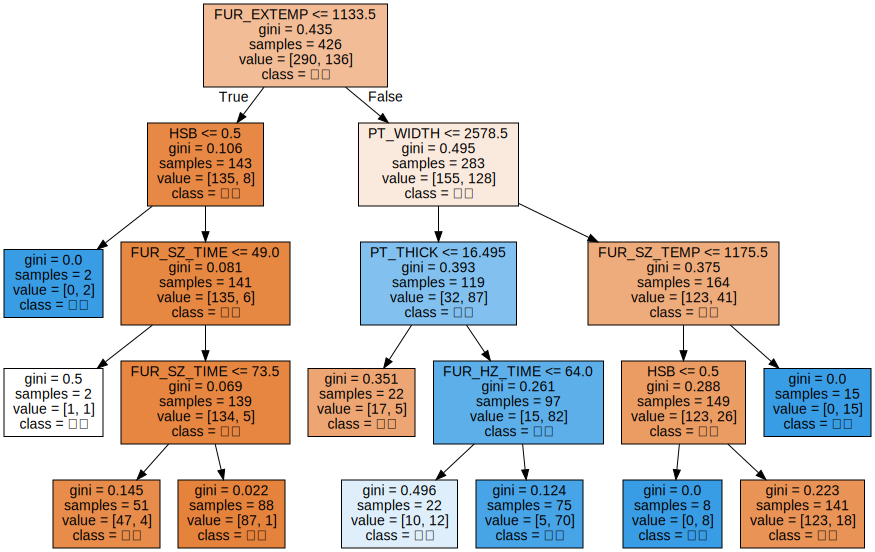

In [73]:
v_feature_name = df_train_x.columns

export_graphviz(tree_final, out_file = 'tree_final.dot', class_names = ['불량', '양품'],
                feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_final.dot') as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

- 트리 분리에 가장 큰 영향을 주는 변수는 FUR_EXTEMP, HSB, PT_WIDTH이다.
- FUR_EXTEMP <= 1133.5 & HSB <= 0.5일 때 P(Y=불량)=0이다.
- FUR_EXTEMP > 1133.5 & PT_WIDTH > 2578.5 & FUR_SZ_TEMP > 1175.5일 때 P(Y=불량)=0이다.
- FUR_EXTEMP > 1133.5 & PT_WIDTH > 2578.5 & FUR_SZ_TEMP <= 1175.5 & HSB <= 0.5일 때 P(Y=불량)=0이다.


In [74]:
y_pred = tree_final.predict(df_test_x)
print('Accuracy : {0:.3f}'.format(tree_final.score(df_test_x, df_test_y)))
print('Confusion Matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy : 0.852
Confusion Matrix : 
[[111  10]
 [ 17  45]]


분류의 정확도는 약 85.2%이며, 모델이 분류기로서의 양호한 성능을 가지고 있는 것으로 보인다.

In [64]:
print(classification_report(df_test_y, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.930     0.930     0.930       128
           1      0.836     0.836     0.836        55

    accuracy                          0.902       183
   macro avg      0.883     0.883     0.883       183
weighted avg      0.902     0.902     0.902       183



- 1(양성)에 대한 precision이 0.836이다. 양성이라고 예측한 데이터 중 실제 양성에 해당하는 비율이 높으므로 잘 분류되었다고 볼 수 있다.
- 1(양성)에 대한 recall이 0.836이다. 실제 양성 중 양성으로 예측된 비율이 높으므로 잘 분류되었다고 볼 수 있다.
- 1(양성)에 대한 f1 score가 0.836이다. 모델의 전체적인 분류 성능이 좋은 것으로 판단된다.

### **랜덤 포레스트 (Random Forest)**

#### **모델 생성하기**

In [66]:
rf_uncustomized = RandomForestClassifier()
rf_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set : {:.3f}'.format(rf_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.907


기본 랜덤포레스트 분류 모델은 train set과 test set에 대해 각각 100%, 90.7%의 정확도를 보여준다. 전체적인 분류 성능은 양호하지만, 그럼에도 train set에 과대적합 되어 있지는 않은지 검토해볼 필요가 있다.

#### **모델 파라미터 설정하기 : n_estimators**

In [77]:
train_accuracy = []; test_accuracy = []
para_n_tree = [n_tree * 5 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree :
    rf = RandomForestClassifier(n_estimators = v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy

In [78]:
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,5,0.988,0.809
1,10,0.986,0.825
2,15,0.998,0.825
3,20,1.000,0.869
4,25,1.000,0.847
5,30,0.998,0.847
6,35,1.000,0.863
7,40,0.998,0.858
8,45,1.000,0.869
9,50,0.998,0.858


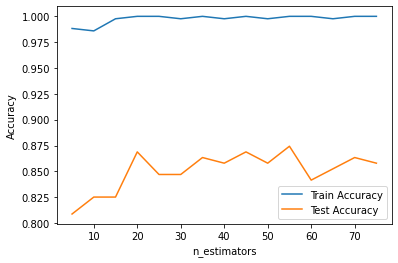

In [79]:
plt.plot(para_n_tree, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('n_estimators')
plt.legend()

- 나무의 개수가 많아지더라도 train과 test에 대한 모델의 성능에는 크게 변화가 없다.
- TestAccuracy가 0.869로 비교적 높게 나타나는 **n_estimators = 20**을 선택한다.

#### **모델 파라미터 설정하기 : max_depth**

In [80]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth :
    rf = RandomForestClassifier(n_estimators = 20,
                                max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainScore'] = train_accuracy
df_accuracy_depth['TestScore'] = test_accuracy

In [81]:
df_accuracy_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.683,0.667
1,2,0.836,0.803
2,3,0.894,0.825
3,4,0.892,0.847
4,5,0.911,0.863
5,6,0.941,0.869
6,7,0.953,0.869
7,8,0.974,0.874
8,9,0.984,0.869
9,10,0.993,0.847


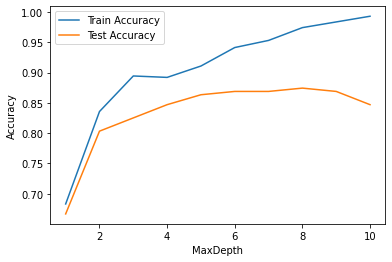

In [82]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('MaxDepth')
plt.legend()

- 모델의 최대 깊이가 증가하면서 train 데이터에 대해 모델의 성능이 향상된다.
- test 데이터에 대해서는 모델의 성능이 상승하였다가 다시 소폭 감소한다.
- TrainScore가 0.874인 **max_depth = 8**를 파라미터로 설정한다. 

#### **모델 파라미터 설정하기 : min_samples_split**

In [83]:
train_accuracy = []; test_accuracy = []
para_split = [n_split * 5 for n_split in range(1,11)]

for v_min_samples_split in para_split :
    rf = RandomForestClassifier(n_estimators = 20,
                                max_depth = 8,
                                min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSampleSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

In [84]:
df_accuracy_split.round(3)

,MinSampleSplit,TrainAccuracy,TestAccuracy
0,5,0.953,0.836
1,10,0.944,0.842
2,15,0.937,0.852
3,20,0.927,0.852
4,25,0.920,0.852
5,30,0.915,0.863
6,35,0.927,0.863
7,40,0.904,0.831
8,45,0.908,0.852
9,50,0.904,0.847


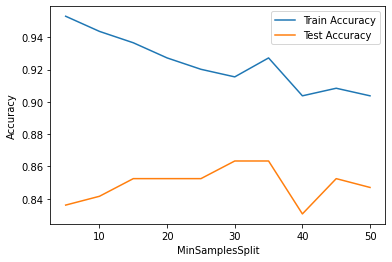

In [85]:
plt.plot(para_split, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('MinSamplesSplit')
plt.legend()

- 분리 노드의 최소 샘플 수가 증가할수록 train에 대한 모델 성능이 감소하는 반면에, test에 대한 모델의 성능은 소폭 상승한 후 일정 수준을 유지한다.
- TrainAccuracy와 TestAccuracy의 폭이 최소화되는 **min_samples_split = 30**를 파라미터로 설정한다. 

#### **모델 파라미터 설정하기 : min_samples_leaf**

In [89]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 5 for n_leaf in range(1,16)]

for v_min_samples_leaf in para_leaf :
    rf = RandomForestClassifier(n_estimators = 20,
                                max_depth = 8,
                                min_samples_split = 20,
                                min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSampleLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

In [90]:
df_accuracy_leaf.round(3)

,MinSampleLeaf,TrainAccuracy,TestAccuracy
0,5,0.894,0.814
1,10,0.894,0.809
2,15,0.864,0.781
3,20,0.862,0.798
4,25,0.845,0.776
5,30,0.831,0.760
6,35,0.838,0.798
7,40,0.822,0.770
8,45,0.831,0.787
9,50,0.812,0.792


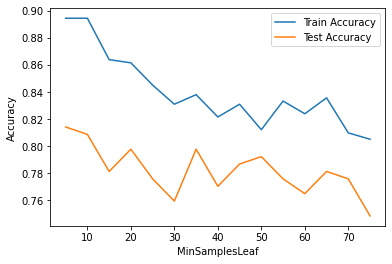

In [91]:
plt.plot(para_leaf, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('MinSamplesLeaf')
plt.legend()

- 리프 노드의 최소 샘플 수가 증가할수록 train과 test에 대한 모델의 성능이 모두 감소한다.
- 모델의 성능을 최대한 끌어올리기 위해 상대적으로 좋은 정확도를 보여주는 **min_samples_leaf = 10**를 파라미터로 설정한다. 

#### **최종 모델 선정 및 모델 평가**

In [92]:
rf_final = RandomForestClassifier(n_estimators = 20,
                                  max_depth = 8,
                                  min_samples_split = 20,
                                  min_samples_leaf = 10)

rf_final.fit(df_train_x, df_train_y)

RandomForestClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=20,
                       n_estimators=20)

In [93]:
y_pred = rf_final.predict(df_test_x)
print('Accuracy : {0:.3f}'.format(rf_final.score(df_test_x, df_test_y)))
print('Confusion Matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy : 0.787
Confusion Matrix : 
[[109  12]
 [ 27  35]]


해당 모델은 약 78.7%의 정확도를 보여준다.

In [95]:
print(classification_report(df_test_y, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.922     0.930     0.926       128
           1      0.833     0.818     0.826        55

    accuracy                          0.896       183
   macro avg      0.878     0.874     0.876       183
weighted avg      0.896     0.896     0.896       183



- 1에 대한 precision이 0.833이다. 불량이라고 예측한 데이터 중 실제 불량에 해당하는 비율이 다소 낮은 것으로 파악된다.
- 1에 대한 recall이 0.818이다. 실제 불량 중 불량으로 분류된 데이터의 개수가 양호한 것으로 보인다.
- 1에 대한 f1 score가 0.826이다. 모델의 전체적인 분류 성능이 양호한 것으로 해석된다.

### **Support Vector Machine (SVM)**

Support Vector Machine 분류를 진행할 때 연속형 설명변수들에 대해 반드시 거쳐야 할 과정은 Scaling이다.

In [94]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_vital)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,PT_THICK,PT_WIDTH,PT_LENGTH,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_EXTEMP,STEEL_KIND,HSB
0,0.266002,1.892738,-1.502921,-0.601726,1.482387,-1.068452,-0.617286,-0.935778,-1.640399,0.21118
1,0.266002,1.892738,-1.502921,-0.601726,1.736725,-0.951831,-0.925971,-1.223776,-1.640399,0.21118
2,0.325539,1.710274,-1.196241,-1.318853,1.482387,-1.768179,-0.823076,-2.030168,-1.640399,0.21118
3,0.325539,1.710274,-1.196241,-0.219259,1.863894,-1.418316,-0.154258,-1.626972,-1.640399,0.21118
4,0.620892,0.630008,-1.636604,-0.792960,2.245401,-1.360005,-1.183209,-1.338975,-1.640399,0.21118


In [95]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled,
                                                       test_size = 0.3)

df_train_y, df_test_y = train_test_split(df_raw_y, 
                                         test_size = 0.3)

print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (426, 10)
test data X size : (183, 10)
train data Y size : (426,)
test data Y size : (183,)


#### **모델 생성하기**

In [96]:
svm_scaled = SVC()
svm_scaled.fit(df_scaled_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.660
Accuracy on test set: 0.710


train과 test 데이터에 대해 각각 66%, 71%의 모델 설명력을 보여준다. Train set에 대한 모델 성능이 test set에 대한 모델 성능보다 낮은 것으로 보아 모델의 파라미터 튜닝이 시급하다.

#### **모델 파라미터 변경 : C (규제에 대한 강도)**

In [97]:
train_accuracy = []; test_accuracy = []

para_c = [10 **c for c in range(-2,2)]
#para_c = [0.1 * c for c in range(1,10)]

for v_C in para_c:
    svm = SVC(C = v_C)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [98]:
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.660,0.710
1,0.10,0.660,0.710
2,1.00,0.660,0.710
3,10.00,0.744,0.694


- C가 1보다 커질 경우 train과 test에 대한 모델의 성능이 오히려 감소한다.
- 모델의 성능을 최대한 이끌어내기 위해 **C = 0.1**로 설정한다.

#### **모델 파라미터 변경 : Gamma (훈련 샘플이 미치는 영향의 범위)**

In [99]:
train_accuracy = []; test_accuracy = []
para_gamma = [0.1 * gammma for gammma in range(1,11)]

for v_gamma in para_gamma :
    svm = SVC(gamma = v_gamma, C = 0.1)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['gamma'] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma['TestAccuracy'] = test_accuracy

In [100]:
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.1,0.66,0.71
1,0.2,0.66,0.71
2,0.3,0.66,0.71
3,0.4,0.66,0.71
4,0.5,0.66,0.71
5,0.6,0.66,0.71
6,0.7,0.66,0.71
7,0.8,0.66,0.71
8,0.9,0.66,0.71
9,1.0,0.66,0.71


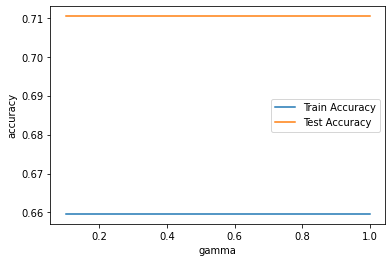

In [101]:
plt.plot(para_gamma, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('gamma')
plt.legend()

- Gamma가 증가하여도 train과 test에 대한 모델의 성능은 모두 변함이 없다.
- 유의한 파라미터라고 보기 어려우므로 해당 파라미터는 고려 대상에서 제외한다.

#### **최종 모델 선정 및 모델 평가**

In [102]:
svc_final = SVC(C = 1)
svc_final.fit(df_scaled_train_x, df_train_y)
y_pred = svc_final.predict(df_scaled_test_x)

print('Accuracy on training set : {:.3f}'.format(svc_final.score(df_scaled_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(svc_final.score(df_scaled_test_x, df_test_y)))

print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits = 3))

Accuracy on training set : 0.660
Accuracy on test set : 0.710
Confusion matrix : 
[[130   0]
 [ 53   0]]
              precision    recall  f1-score   support

           0      0.710     1.000     0.831       130
           1      0.000     0.000     0.000        53

    accuracy                          0.710       183
   macro avg      0.355     0.500     0.415       183
weighted avg      0.505     0.710     0.590       183



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- 해당 모델은 train과 test 데이터에 대해 각각 66%, 71%의 모델 설명력을 갖는다.
- 1에 대한 precision, recall, 그리고 f1-score이 모두 0.000으로, 모델의 성능이 굉장히 안 좋다는 판단을 내릴 수 있다.

### **KNN**

#### **모델 생성하기**

In [137]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_vital,
                                                                df_raw_y,
                                                                test_size = 0.3)

print(df_train_x.shape)
print(df_test_x.shape)
print(df_train_y.shape)
print(df_test_y.shape)

(426, 10)
(183, 10)
(426,)
(183,)


In [138]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set : {:.3f}'.format(knn_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(knn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.819
Accuracy on test set : 0.683


#### **이웃 수 증가에 따른 정확도 변화**

In [164]:
train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors :
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['Neighbors'] = para_n_neighbors
df_accuracy_neighbors['TrainScore'] = train_accuracy
df_accuracy_neighbors['TestScore'] = test_accuracy

In [165]:
df_accuracy_neighbors.round(3)

,Neighbors,TrainScore,TestScore
0,1,1.000,0.678
1,2,0.866,0.579
2,3,0.859,0.705
3,4,0.829,0.661
4,5,0.819,0.683
5,6,0.812,0.689
6,7,0.824,0.699
7,8,0.803,0.683
8,9,0.805,0.699
9,10,0.808,0.699


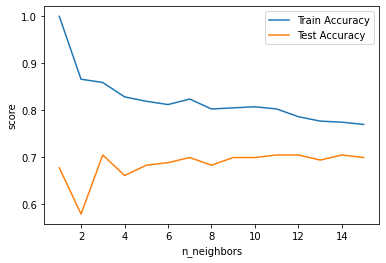

In [166]:
plt.plot(para_n_neighbors, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_n_neighbors, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('score'); plt.xlabel('n_neighbors')
plt.legend()

#### **가중치별 이웃 수 증가에 따른 정확도 변화**

In [167]:
train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(3,31)] * 2
para_weights = (['uniform']) * 28 + (['distance'] * 28)

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights) :
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors,
                               weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_weights = pd.DataFrame()
df_accuracy_weights['Neighbors'] = para_n_neighbors
df_accuracy_weights['Weights'] = para_weights
df_accuracy_weights['TrainAccuracy'] = train_accuracy
df_accuracy_weights['TestAccuracy'] = test_accuracy

In [168]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = 'Neighbors',
                                                      columns = 'Weights',
                                                      values = ['TrainAccuracy', 'TestAccuracy'])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
3                   1.0  0.859155     0.693989  0.704918
4                   1.0  0.828638     0.699454  0.661202
5                   1.0  0.819249     0.688525  0.683060
6                   1.0  0.812207     0.704918  0.688525
7                   1.0  0.823944     0.677596  0.699454
8                   1.0  0.802817     0.715847  0.683060
9                   1.0  0.805164     0.699454  0.699454
10                  1.0  0.807512     0.688525  0.699454
11                  1.0  0.802817     0.677596  0.704918
12                  1.0  0.786385     0.704918  0.704918
13                  1.0  0.776995     0.683060  0.693989
14                  1.0  0.774648     0.699454  0.704918
15                  1.0  0.769953     0.688525  0.699454
16                  1.0  0.779343     0.693989  0.683060
17                  1.0  0.788732     0.693989  0.688525
18                  1.0  0.791080     0.688525  0.683060
19                  1.0  0.781690     0.677596  0.661202
20                  1.0  0.786385     0.699454  0.683060
21                  1.0  0.774648     0.688525  0.666667
22                  1.0  0.779343     0.693989  0.666667
23                  1.0  0.765258     0.683060  0.672131
24                  1.0  0.781690     0.688525  0.661202
25                  1.0  0.767606     0.683060  0.672131
26                  1.0  0.781690     0.683060  0.661202
27                  1.0  0.765258     0.677596  0.672131
28                  1.0  0.762911     0.677596  0.661202
29                  1.0  0.765258     0.677596  0.677596
30                  1.0  0.765258     0.677596  0.683060

In [169]:
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + '-' + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy-distance,TrainAccuracy-uniform,TestAccuracy-distance,TestAccuracy-uniform
Neighbors,,,,
3,1.0,0.859155,0.693989,0.704918
4,1.0,0.828638,0.699454,0.661202
5,1.0,0.819249,0.688525,0.683060
6,1.0,0.812207,0.704918,0.688525
7,1.0,0.823944,0.677596,0.699454


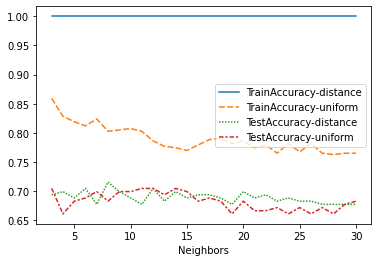

In [170]:
sns.lineplot(data = df_accuracy_weights_pivot)

#### **거리 계산 방법별 이웃 수 증가에 따른 정확도 변화**

In [171]:
train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(1,11)] * 3
para_metric = (['minkowski']) * 10 + (['euclidean']) * 10 + (['manhattan']) * 10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric) :
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors,
                               metric = v_metric,
                               weights = 'uniform')
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_metric = pd.DataFrame()
df_accuracy_metric['Neighbors'] = para_n_neighbors
df_accuracy_metric['Metric'] = para_metric
df_accuracy_metric['TrainAccuracy'] = train_accuracy
df_accuracy_metric['TestAccuracy'] = test_accuracy

In [179]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = 'Neighbors',
                                                    columns = 'Metric',
                                                    values = ['TrainAccuracy', 'TestAccuracy'])

In [180]:
level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + '-' + level1
df_accuracy_metric_pivot.head()

,TrainAccuracy-euclidean,TrainAccuracy-manhattan,TrainAccuracy-minkowski,TestAccuracy-euclidean,TestAccuracy-manhattan,TestAccuracy-minkowski
Neighbors,,,,,,
1,1.000000,1.000000,1.000000,0.677596,0.704918,0.677596
2,0.866197,0.866197,0.866197,0.579235,0.612022,0.579235
3,0.859155,0.854460,0.859155,0.704918,0.726776,0.704918
4,0.828638,0.823944,0.828638,0.661202,0.688525,0.661202
5,0.819249,0.823944,0.819249,0.683060,0.688525,0.683060


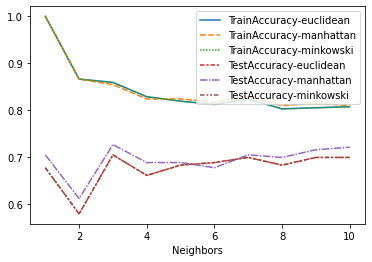

In [181]:
sns.lineplot(data = df_accuracy_metric_pivot)

#### **최종 모델 선정 및 모델 평가**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5,
                                 weights = 'uniform',
                                 metric = 'euclidean')
knn_model.fit(df_train_x, df_train_y)
y_pred = knn_model.predict(df_test_x)

print('Train data accuracy : {0:.3f}',format(knn_model.score(df_train_x, df_train_y).round(3)))
print('Test data accuracy : {0:.3f}',format(knn_model.score(df_test_x, df_test_y).round(3)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits = 3))

Train data accuracy : {0:.3f} 0.916
Test data accuracy : {0:.3f} 0.908
Confusion matrix : 
[[1010   11]
 [  93   11]]
              precision    recall  f1-score   support

           0      0.916     0.989     0.951      1021
           1      0.500     0.106     0.175       104

    accuracy                          0.908      1125
   macro avg      0.708     0.547     0.563      1125
weighted avg      0.877     0.908     0.879      1125



- 1 기준 f1 score는 17.1% -> 다른 모델 대비 매우 낮음
- precision은 높으나 recall이 매우 낮음